In [29]:
# For traditional part the algorithm, you need to run follow this order
# 1. dataset_obtain
# 2. feature_get
# 3. classifier
# 4. final_result

In [30]:
# This file is used to get the positive and negative examples
# You need to create two files to access the positive and negative images
    # starfish-image
    # neg-image

In [31]:
# All import
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
import random

In [32]:
# All input
image_set = '.\\tensorflow-great-barrier-reef\\train_images'
data_set = pd.read_csv(
    '.\\tensorflow-great-barrier-reef\\train.csv')

In [33]:
# A function to spilt the str information to list/dict
def spilt_annotations(annotations_str):
    annotations_list = eval(annotations_str)
    for i in range(len(annotations_list)):
        dict_temp = eval(str(annotations_list[i]))
        annotations_list[i] = dict_temp
    return annotations_list

In [34]:
# A function to get the all true starfish
# Input: csv heading number n
# Output: download all starfish picture
          # name as: n_1.jpg, n_2.jpg,...
def get_starfish_image(n):
    video_file_list = ['video_0', 'video_1', 'video_2']
    image_file = data_set.iloc[n]['video_id']
    image_num = data_set.iloc[n]['video_frame']
    image_path = '.\\tensorflow-great-barrier-reef\\train_images\\'\
                 + video_file_list[image_file] + '\\'\
                 + str(image_num) + '.jpg'
    img = cv2.imread(image_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    list = spilt_annotations(data_set.iloc[n]['annotations'])
    if len(list) != 0:
        num = 0
        for dict in list:
            (left, top) = (dict['x'], dict['y'])
            (right, bottom) = (dict['x'] + dict['width'], dict['y'] + dict['height'])
            roi_img = img_RGB[top:bottom, left:right]
            plt.imshow(roi_img)
            roi_img_BGR = cv2.cvtColor(roi_img, cv2.COLOR_RGB2BGR)
            img_name = '.\\starfish-image\\' + str(n) + '_' + str(num) + '.jpg'
            cv2.imwrite(img_name, roi_img_BGR)
            num = num + 1
    else:
        pass

In [35]:
# A function to get the one random neg image with no starfish image
# Input: csv heading number range (n,m)
# Output: download the neg image into neg-image folder
          # name as: n.jpg

def get_neg_image(random_range,size):
    for i in tqdm(range(random_range)):
        video_file_list = ['video_0', 'video_1', 'video_2']
        image_file = data_set.iloc[i]['video_id']
        image_num = data_set.iloc[i]['video_frame']
        image_path = '.\\tensorflow-great-barrier-reef\\train_images\\'\
                     + video_file_list[image_file] + '\\'\
                     + str(image_num) + '.jpg'
        img = cv2.imread(image_path)
        img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        list = spilt_annotations(data_set.iloc[i]['annotations'])
        # if this picture no starfish
        # then extract one random position image
        if len(list) == 0:
            width, height = size[1], size[0]
            y = int(random.random() * (720 - height))
            x = int(random.random() * (1280 - width))
            img_temp = img_RGB[y:y + height, x:x + width]
            img_temp = cv2.cvtColor(img_temp, cv2.COLOR_RGB2BGR)
            img_name = '.\\neg-image\\' + str(i) + '.jpg'
            cv2.imwrite(img_name, img_temp)
        else:
            pass

In [36]:
# A function to get the one neg image with around the starfish image
# Input: csv heading number n
# Output: download the neg image into neg-image folder
        # name as: n_1.jpg, n_2.jpg

def get_neg_image_2(n):
    video_file_list = ['video_0', 'video_1', 'video_2']
    image_file = data_set.iloc[n]['video_id']
    image_num = data_set.iloc[n]['video_frame']
    image_path = '.\\tensorflow-great-barrier-reef\\train_images\\'\
                 + video_file_list[image_file] + '\\'\
                 + str(image_num) + '.jpg'
    img = cv2.imread(image_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    list = spilt_annotations(data_set.iloc[n]['annotations'])
    if len(list) != 0:
        num = 0
        for dict in list:
            # extract up starfish image
            (left, top) = (dict['x'], dict['y'])
            (right, bottom) = (dict['x'] + dict['width'], dict['y'] + dict['height'])
            roi_img = img_RGB[2*top-bottom:top, left:right]
            if roi_img.shape[0]>40 and roi_img.shape[1]>40:
                roi_img_BGR = cv2.cvtColor(roi_img, cv2.COLOR_RGB2BGR)
                img_name = '.\\neg-image\\' + str(n) + '_1' + str(num) + '.jpg'
                cv2.imwrite(img_name, roi_img_BGR)

            # extract bottom starfish image
            (left, top) = (dict['x'], dict['y'])
            (right, bottom) = (dict['x'] + dict['width'], dict['y'] + dict['height'])
            roi_img = img_RGB[bottom:2*bottom-top, left:right]
            if roi_img.shape[0]>40 and roi_img.shape[1]>40:
                roi_img_BGR = cv2.cvtColor(roi_img, cv2.COLOR_RGB2BGR)
                img_name = '.\\neg-image\\' + str(n) + '_2' + str(num) + '.jpg'
                cv2.imwrite(img_name, roi_img_BGR)
            num = num + 1
    else:
        pass

100%|██████████| 18800/18800 [05:09<00:00, 60.68it/s]


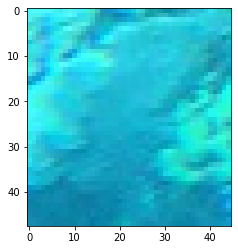

In [37]:
# for SVM classifier
# postive
# 80% data for postive dataset
# 23500*0.8 = 18800
for i in tqdm(range(18800)):
   get_starfish_image(i)

# negative
# for all 80% dataset
# get the one random neg image with no starfish image
get_neg_image(random_range=18800,size = (100,100))

In [38]:
# for DT classifier
# postive (same with SVM)
# 80% data for postive dataset
# 23500*0.8 = 18800
# for i in tqdm(range(18800)):
#    get_starfish_image(i)

# negative
# for top formal 0-9000 dataset
# get the one random neg image with no starfish image
# get_neg_image(random_range=9000,size = (50,50))

# for 9000-18000 dataset
# get the neg image around starfish
# for i in tqdm(range(9000,18000)):
#    get_neg_image_2(i)

# gradient[2000:]